In [99]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

def encoder(input, input_feature):
    
    with tf.name_scope("encoder"):

        with tf.name_scope("layer_1"):
            
            input_features = input_feature
            w = tf.get_variable('weights1', [input_features, 1000], initializer=tf.random_normal_initializer(stddev=(1.0/input_features)**0.5))
            b = tf.get_variable('biases1', [1000],initializer=tf.constant_initializer(0.0))
        
            pool = tf.reshape(input, [-1, input_features])
            fc1 = tf.nn.sigmoid(tf.matmul(pool, w) + b, name='relu')
        
        with tf.name_scope("layer_2"):
        
            w2 = tf.get_variable('weights2', [1000, 500], initializer=tf.random_normal_initializer(stddev=(1.0/1000)**0.5))
            b2 = tf.get_variable('biases2', [500],initializer=tf.constant_initializer(0.0))
        
            pool2 = tf.reshape(fc1, [-1, 1000])
            fc2 = tf.nn.sigmoid(tf.matmul(pool2, w2) + b2, name='relu')
        
        with tf.name_scope("layer_3"):
        
            w3 = tf.get_variable('weights3', [500, 250], initializer=tf.random_normal_initializer(stddev=(1.0/500)**0.5))
            b3 = tf.get_variable('biases3', [250],initializer=tf.constant_initializer(0.0))
        
            pool3 = tf.reshape(fc2, [-1, 500])
            fc3 = tf.nn.sigmoid(tf.matmul(pool3, w3) + b3, name='relu')
            
        with tf.name_scope("layer_4"):
        
            w4 = tf.get_variable('weights4', [250, 2], initializer=tf.random_normal_initializer(stddev=(1.0/250)**0.5))
            b4 = tf.get_variable('biases4', [2],initializer=tf.constant_initializer(0.0))
        
            pool4 = tf.reshape(fc3, [-1, 250])
            fc4 = tf.nn.sigmoid(tf.matmul(pool4, w4) + b4, name='relu')
    
    return fc4

def decoder(input, input_feature):
    
    with tf.name_scope("decoder"):

        with tf.name_scope("layer_1"):
            
            input_features = input_feature
            w = tf.get_variable('weights12', [input_features, 250], initializer=tf.random_normal_initializer(stddev=(1.0/2)**0.5))
            b = tf.get_variable('biases12', [250],initializer=tf.constant_initializer(0.0))
        
            pool = tf.reshape(input, [-1, input_features])
            fc11 = tf.nn.sigmoid(tf.matmul(pool, w) + b, name='relu')
        
        with tf.name_scope("layer_2"):
        
            w2 = tf.get_variable('weights22', [250, 500], initializer=tf.random_normal_initializer(stddev=(1.0/250)**0.5))
            b2 = tf.get_variable('biases22', [500],initializer=tf.constant_initializer(0.0))
        
            pool2 = tf.reshape(fc11, [-1, 250])
            fc12 = tf.nn.sigmoid(tf.matmul(pool2, w2) + b2, name='relu')
        
        with tf.name_scope("layer_32"):
        
            w3 = tf.get_variable('weights32', [500, 1000], initializer=tf.random_normal_initializer(stddev=(1.0/500)**0.5))
            b3 = tf.get_variable('biases32', [1000],initializer=tf.constant_initializer(0.0))
        
            pool3 = tf.reshape(fc12, [-1, 500])
            fc13 = tf.nn.sigmoid(tf.matmul(pool3, w3) + b3, name='relu')
            
        with tf.name_scope("layer_4"):
        
            w4 = tf.get_variable('weights42', [1000, 784], initializer=tf.random_normal_initializer(stddev=(1.0/1000)**0.5))
            b4 = tf.get_variable('biases42', [784],initializer=tf.constant_initializer(0.0))
        
            pool4 = tf.reshape(fc13, [-1, 1000])
            fc14 = tf.nn.sigmoid(tf.matmul(pool4, w4) + b4, name='relu')
    
    return fc14


X = tf.placeholder(tf.float32, [None, 784], name="X_placeholder")

model = encoder(X, 784)
output = decoder(model, 2)


l2 = tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(output, X)),1))
train_loss = tf.reduce_mean(l2)

global_step = tf.Variable(0, name='global_step',trainable=False)

optimizer = tf.train.AdamOptimizer(learning_rate=0.001,  name='Adam').minimize(train_loss, global_step=global_step)

MNIST = input_data.read_data_sets("/data/mnist", one_hot=True)

BATCH_SIZE = 100
training_epochs = 200

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    initial_step = global_step.eval()

    n_batches = int(MNIST.train.num_examples / BATCH_SIZE)

    total_loss = 0.0
    for epoch in range(training_epochs):
      total_loss = 0.0
      for index in range(BATCH_SIZE):
          X_batch, Y_batch = MNIST.train.next_batch(BATCH_SIZE)
          _, out, loss_batch = sess.run([optimizer, output, train_loss],feed_dict={X: X_batch}) 
          total_loss += loss_batch
      if epoch%10 == 0:
        print("Total loss at epoch {}".format(epoch)," is {}".format(total_loss/BATCH_SIZE))


Extracting /data/mnist/train-images-idx3-ubyte.gz
Extracting /data/mnist/train-labels-idx1-ubyte.gz
Extracting /data/mnist/t10k-images-idx3-ubyte.gz
Extracting /data/mnist/t10k-labels-idx1-ubyte.gz
Total loss at epoch 0  is 7.414696755409241
Total loss at epoch 10  is 6.342852268218994
Total loss at epoch 20  is 6.072218623161316
Total loss at epoch 30  is 5.9323591709136965
Total loss at epoch 40  is 5.8719602394104005
Total loss at epoch 50  is 5.663709354400635
Total loss at epoch 60  is 5.616005120277404
Total loss at epoch 70  is 5.492730760574341
Total loss at epoch 80  is 5.465679950714112
Total loss at epoch 90  is 5.441252055168152
Total loss at epoch 100  is 5.401034083366394
Total loss at epoch 110  is 5.377362885475159
Total loss at epoch 120  is 5.34897096157074
Total loss at epoch 130  is 5.504457058906556
Total loss at epoch 140  is 5.307646417617798
Total loss at epoch 150  is 5.317719311714172
Total loss at epoch 160  is 5.2618550062179565
Total loss at epoch 170  is 5

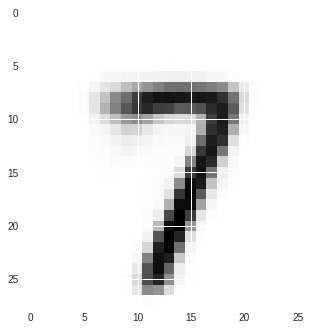

In [100]:
from matplotlib import pyplot as plt
plt.imshow(out[10].reshape(28,28))

In [0]:
tf.reset_default_graph()